Explore the sky data from Parker

In [26]:
import os
import h5py
import numpy as np
import desisim.simexp
import specsim.config
import astropy.units as u
# -- local -- 
import env
from feasibgs import util as UT

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

import dark sky data

In [3]:
dark_sky = np.loadtxt(UT.dat_dir()+'sky/spec-sky.dat', unpack=True, skiprows=2, usecols=[0,1])

Text(0.5,1,'Dark Sky')

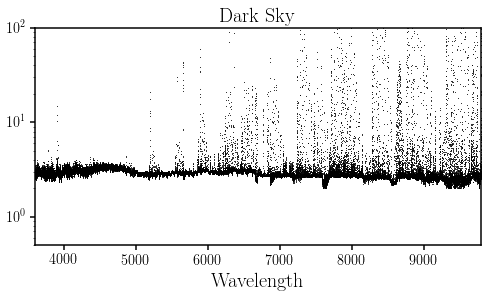

In [40]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
sub.scatter(dark_sky[0], dark_sky[1], c='k', lw=0, s=1.)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_yscale("log")
sub.set_ylim([0.5, 100])
sub.set_title('Dark Sky', fontsize=20)

bright sky data

In [29]:
f = UT.dat_dir()+'sky/moon_sky_spectrum.hdf5'
assert os.path.isfile(f)
f_hdf5 = h5py.File(f, 'r')
waves, skys = [], [] 
for i in range(4): 
    waves.append(f_hdf5['sky'+str(i)+'/wave'].value)
    skys.append(f_hdf5['sky'+str(i)+'/sky'].value)

mean moon spectra but with a very strong OI line

Text(0.5,1,'Moon Spectra with strong OI line')

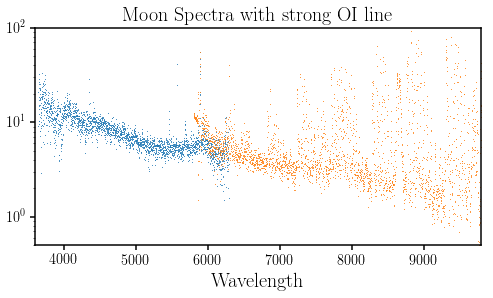

In [41]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
sub.scatter(10*waves[0], skys[0], lw=0, s=1.)
sub.scatter(10*waves[1], skys[1], lw=0, s=1.)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_yscale("log")
sub.set_ylim([0.5, 100])
sub.set_title("Moon Spectra with strong OI line", fontsize=20)

Text(0.5,1,'very bright night')

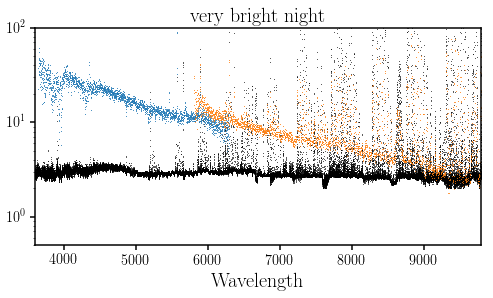

In [42]:
fig = plt.figure(figsize=(8,4))
sub = fig.add_subplot(111)
sub.scatter(dark_sky[0], dark_sky[1], c='k', lw=0, s=0.5)
sub.scatter(10*waves[2], skys[2], lw=0, s=1.)
sub.scatter(10*waves[3], skys[3], lw=0, s=1.)
sub.set_xlabel('Wavelength', fontsize=20)
sub.set_xlim([3600., 9800.])
sub.set_yscale("log")
sub.set_ylim([0.5, 100])
sub.set_title("very bright night", fontsize=20)